In [30]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
b = phoebe.load('./data/synthetic/after_final_round.bundle')

/usr/local/lib/python3.9/dist-packages/phoebe/parameters/parameters.py:10382: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self._value = np.array(value)


In [4]:
print(b['ecc@binary@distribution'])

Parameter: ecc@mvg@distribution
                       Qualifier: ecc
                     Description: distribution for the referenced parameter
                           Value: <distl.composite <distl.gaussian loc=0.0 scale=0.05> & <distl.uniform low=0.0 high=1.0> unit=>
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [5]:
b.solutions

['rvperiod_solution',
 'rvperiod_solution_2',
 'lcperiod_bls_solution',
 'lcperiod_ls_solution',
 'rvgeom_solution',
 'ebai_solution',
 'lcgeom_solution',
 'nm_solution',
 'round_1',
 'round_2',
 'round_3',
 'round_4',
 'final_round']

In [6]:
b.adopt_solution(solution='final_round',
                 adopt_values=False,
                 adopt_distributions=True,
                 distributions_convert='mvsamples',
                 distribution='ndg_final')

<ParameterSet: 5 parameters | qualifiers: ecc, per0, vgamma, q, asini>

In [19]:
print(b['value@ecc@binary@distribution@ndg_final'].samples)

[0.00247691 0.00236435 0.00254631 ... 0.00213446 0.00195524 0.0018807 ]


In [16]:
help(b['value@ecc@ndg_final@distribution'])

Help on MVSamplesSlice in module phoebe.dependencies.distl.distl object:

class MVSamplesSlice(BaseMultivariateSliceDistribution)
 |  MVSamplesSlice(multivariate, dimension, unit=None, label=None, label_latex=None, wrap_at=None, uniqueid=None)
 |  
 |  Method resolution order:
 |      MVSamplesSlice
 |      BaseMultivariateSliceDistribution
 |      BaseUnivariateDistribution
 |      BaseDistribution
 |      BaseDistlObject
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  cdf(self, *args, **kwargs)
 |      Expose the cummulative density function (cdf) at values of `x`.
 |      
 |      See [scipy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.cdf.html)
 |      
 |      This method is just a wrapper around the scipy.stats method on
 |      <<class>.dist_constructor_object> after doing any requested unit-conversions.
 |      
 |      See also:
 |      
 |      * <<class>.logcdf>
 |      * <<class>.pdf>
 |      
 |      Arguments
 |     

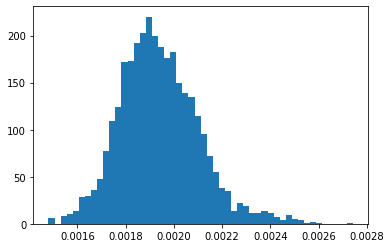

In [20]:
plt.hist(b['value@ecc@binary@distribution@ndg_final'].samples, bins=50)
plt.show()

In [26]:
mean = b['value@ecc@binary@distribution@ndg_final'].mean()
stdev = b['value@ecc@binary@distribution@ndg_final'].std()
print('Mean: ', mean)
print('Stdev:', stdev)

Mean:  0.001939574554578837
Stdev: 0.00016468390706318733


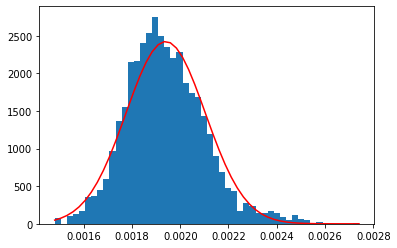

In [48]:
vals, bins, _ = plt.hist(b['value@ecc@binary@distribution@ndg_final'].samples, bins=50, density=True)
uvg = st.norm.pdf(bins, mean, stdev)
plt.plot(bins, uvg, 'r-')
plt.show()

In [37]:
dir(b['value@ecc@binary@distribution@ndg_final'])

['__add__',
 '__and__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__or__',
 '__pow__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmul__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_dimension',
 '_dist_constructor_object_cache',
 '_dist_constructor_object_clear_cache',
 '_label',
 '_label_latex',
 '_multivariate',
 '_parents_with_constructor_object_cache',
 '_return_with_units',
 '_uniqueid',
 '_unit',
 '_wrap_at',
 '_xlabel',
 'arccos',
 'arcsin',
 'arctan',
 'arctan2',
 'bw_method',
 'cached_sample',
 'cdf',
 'change_slice_dimension',
 'clear_cached_sample',
 'copy',
 'cos',
 'de

In [38]:
ecc_posterior = b['value@ecc@binary@distribution@ndg_final']

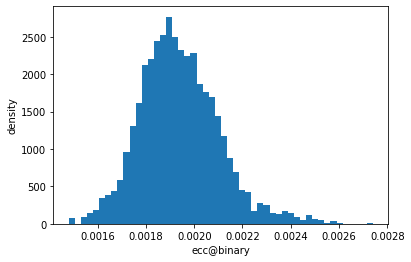

In [44]:
_ = ecc_posterior.plot_sample(bins=50)

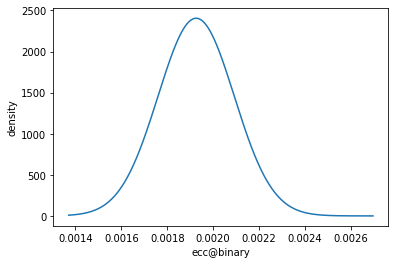

In [45]:
_ = ecc_posterior.plot_gaussian()

In [49]:
help(ecc_posterior.plot)

Help on method plot in module phoebe.dependencies.distl.distl:

plot(size=100000.0, unit=None, wrap_at=None, seed=None, samples=None, plot_sample=True, plot_sample_kwargs={'color': 'gray'}, plot_pdf=True, plot_pdf_kwargs={'color': 'red'}, plot_cdf=False, plot_cdf_kwargs={'color': 'green'}, plot_gaussian=False, plot_gaussian_kwargs={'color': 'blue'}, plot_uncertainties=True, plot_uncertainties_kwargs={'color': 'black', 'linestyle': 'dashed'}, label=None, xlabel=None, show=False, **kwargs) method of phoebe.dependencies.distl.distl.MVSamplesSlice instance
    Plot both the analytic distribution function as well as a sampled
    histogram from the distribution.  Requires matplotlib to be installed.
    
    See also:
    
    * <<class>.plot_sample>
    * <<class>.plot_pdf>
    * <<class>.plot_cdf>
    * <<class>.plot_gaussian>
    
    Arguments
    -----------
    * `size` (int, optional, default=1e5): number of points to sample for
        the histogram.  See also <<class>.sample>.  Wil

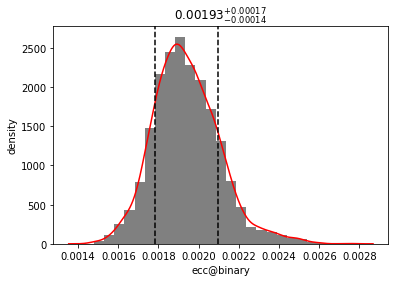

In [54]:
_ = ecc_posterior.plot(plot_pdf=True)

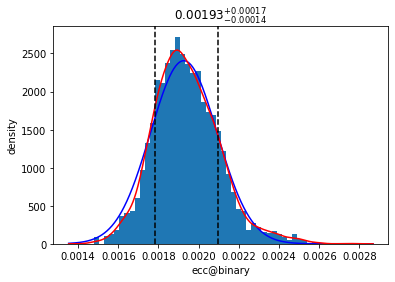

In [57]:
_ = ecc_posterior.plot(plot_sample=True, plot_sample_kwargs={'bins': 50}, plot_gaussian=True, plot_uncertainties=True)

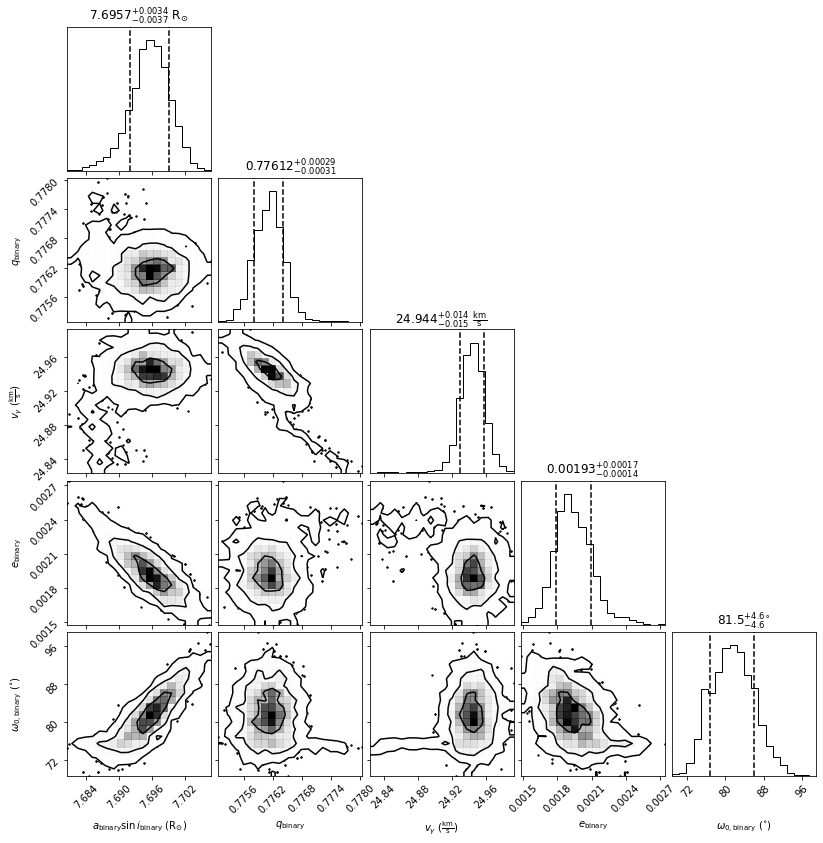

In [59]:
_ = b.plot_distribution_collection('ndg_final')

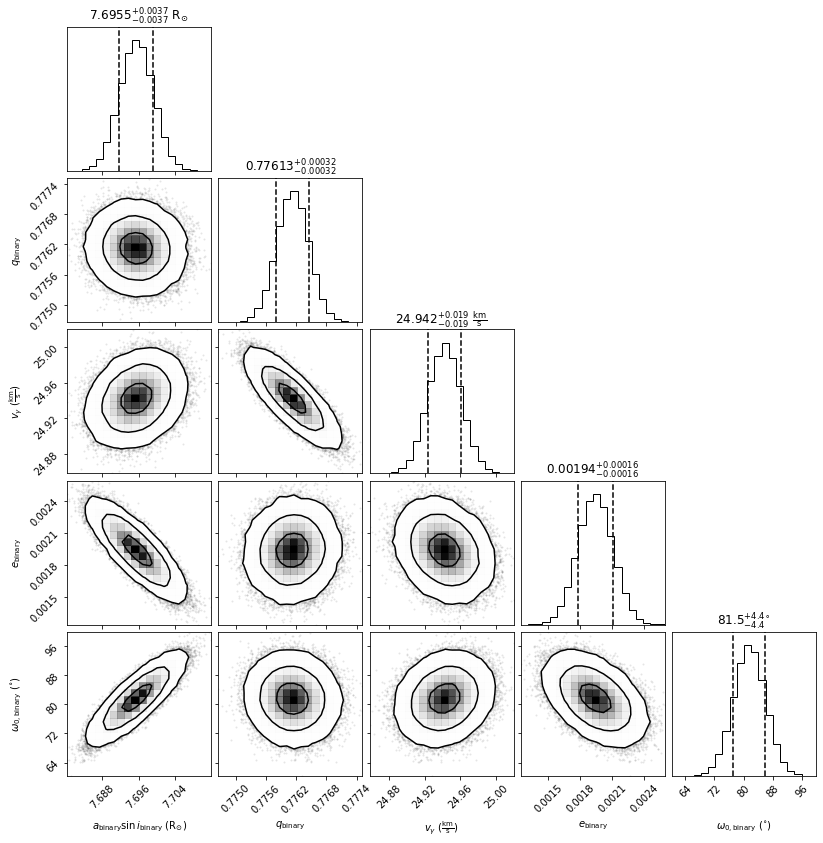

In [61]:
_ = b.plot('final_round', style='corner', distributions_convert='mvgaussian')